# Mini-project



## General guidelines

We want to make a typical study of a ML problem.

We're going to use Fashion-MNIST ("*fashion-mnist-reshaped.npz*")  as data set, attempting to classify the pictures correctly.

There are 2 parts in the project:
- use `DecisionTreeClassifier` and PCA from sklearn to classify the data
- make your own multi-class classifier, deriving its updates from scratch
The first part weights more in the total grade than the second one.

In the first part, the goal is to showcase a typical hyper-parameter tuning. We will simulate the fact of having different tasks by restricting ourselves to different dataset size, and comment on how hyper-parameters choice can depend a lot on how much data we have at hand.

General advice: **write clean code**, well factored in functions/classes, for each question, as much as possible.
This will make your code **easier to read and also easier to run!**. You may re-use code in several questions. If it's  well factored, it will be easier to code the next questions.

Tips: you may want to use 
- `sklearn.tree.DecisionTreeClassifier`
- `sklearn.model_selection.train_test_split`
- `sklearn.decomposition.PCA`
- `sklearn.model_selection.cross_validate` 

to lighten your code.

## Part 1: using `sklearn.tree.DecisionTreeClassifier`

## (about 15 points over 20 total)

Decision Trees are powerful methods, however they can easily overfit. The number of parameters in the model essenitially grows like $\sim O(2^{maxDepth})$, i.e. exponentially with the depth of the tree.

### Part 1.1: `Ntrain+Nval=1000, Nvalid=1000, Ntest=10000`

In this part we use this amount of data.
- import the data, split the "train+validation" sets. Keep the test set for the **very** end.
- attempt direct classification using a `sklearn.tree.DecisionTreeClassifier`. Optimize the hyper-parameter `max_depth`. Measure and store the validation accuracy for the best choice of `max_depth`.
Do you fear you may be overfitting ? Explain your answer.
- Now, let's add some PCA as pre-processing. 
    - Using `max_depth=5`, what is the best number of PCA components (nComp_PCA) to keep ? Hint: you may use something like `nComp_range = np.array(list(np.arange(1,50))+[50,100,200,400,783,784])` as the range of nComp_PCA values to be explored.
    - Using `max_depth=12`, what is the best number of PCA components (nComp_PCA) to keep ?
    - Can you explain why this optimal number changes with depth ? 
- Find the best (max_depth, nComp_PCA) pair. 
- Can you explain the behavior of the optimal `max_depth`, let's call it $m*$, with `nComp_PCA`, at **small** `nComp_PCA` ?
- Can you explain the behavior of the optimal `max_depth`, let's call it $m*$, with `nComp_PCA`, at **large** `nComp_PCA` ?
- Measure the cross-validation error for this best pair. Are you surprised with the result?

In [3]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [4]:
LoadObject = np.load("C:/Users/dadinho/Desktop/projet/fashion-mnist-reshaped.npz") # please put your data over there so it's easy for me to run your code
linearPictureLength = 28
X = LoadObject['train_images']
y = LoadObject['train_labels']
## we do not use the TEST SET for now:
# Xtest = LoadObject['test_images']
# ytest = LoadObject['test_labels']

ratio_train = 0.016667
ratio_valid = 0.016667
ratio_test = 0.16667
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio_test,train_size=ratio_train*2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)


In [7]:

print(X_train.shape)
print(X_val.shape)


(1000, 784)
(1000, 784)


In [194]:
l=[]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
for c in max_depth:

        clf = DecisionTreeClassifier(max_depth=c)

        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        trainscore = clf.score(X_train,y_train)
        validscore = clf.score(X_valid,y_valid)
        print("max_depth", c , "   training score:",trainscore, ". valid score:", validscore)
        l.append(validscore)
print("max : " ,max(l))

max_depth 10    training score: 0.978 . valid score: 0.699
max_depth 20    training score: 1.0 . valid score: 0.702
max_depth 30    training score: 1.0 . valid score: 0.697
max_depth 40    training score: 1.0 . valid score: 0.704
max_depth 50    training score: 1.0 . valid score: 0.711
max_depth 60    training score: 1.0 . valid score: 0.719
max_depth 70    training score: 1.0 . valid score: 0.702
max_depth 80    training score: 1.0 . valid score: 0.714
max_depth 90    training score: 1.0 . valid score: 0.711
max_depth 100    training score: 1.0 . valid score: 0.709
max_depth 110    training score: 1.0 . valid score: 0.707
max_depth None    training score: 1.0 . valid score: 0.696
max :  0.719


In [218]:
    n=[]
    ## applt the SAME transform to the validation data

    ## classification
    clf = DecisionTreeClassifier(max_depth=60)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    scores = cross_val_score(clf, X_valid_Transformed, y_valid)
    print(scores)
    print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                                  scores.std()),
              end="\n\n")
    score = balanced_accuracy_score(y_valid, y_pred)  # scoring
    print("Balanced accuracy score: {}".format(score))

[0.65  0.66  0.675 0.695 0.66 ]
mean: 0.668 (std: 0.016)

Balanced accuracy score: 0.7082625639932832


In [197]:
nComp_range = np.array(list(np.arange(1,50))+[50,100,200,400,783,784])
n=[]
for nC in nComp_range:
    
    ## pre-processing 
    preProc = sklearn.decomposition.PCA(n_components=nC, copy=True)
    preProc.fit(X_train)
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train_Transformed, y_train)
    trainscore = clf.score(X_train_Transformed,y_train)
    validscore = clf.score(X_valid_Transformed,y_valid)
    ## TODO: compute scores here
    n.append(trainscore)
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
print("max : " ,max(n))

nombre Composants 1    training score: 0.355 . valid score: 0.315
nombre Composants 2    training score: 0.567 . valid score: 0.494
nombre Composants 3    training score: 0.627 . valid score: 0.564
nombre Composants 4    training score: 0.663 . valid score: 0.594
nombre Composants 5    training score: 0.666 . valid score: 0.605
nombre Composants 6    training score: 0.665 . valid score: 0.611
nombre Composants 7    training score: 0.665 . valid score: 0.61
nombre Composants 8    training score: 0.673 . valid score: 0.616
nombre Composants 9    training score: 0.672 . valid score: 0.617
nombre Composants 10    training score: 0.672 . valid score: 0.617
nombre Composants 11    training score: 0.673 . valid score: 0.619
nombre Composants 12    training score: 0.673 . valid score: 0.617
nombre Composants 13    training score: 0.673 . valid score: 0.622
nombre Composants 14    training score: 0.674 . valid score: 0.616
nombre Composants 15    training score: 0.675 . valid score: 0.617
nombr

In [200]:
nComp_range = np.array(list(np.arange(1,50))+[50,100,200,400,783,784])
n=[]
for nC in nComp_range:
    
    ## pre-processing 
    preProc = sklearn.decomposition.PCA(n_components=nC, copy=True)
    preProc.fit(X_train)
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
    clf = DecisionTreeClassifier(max_depth=12)
    clf.fit(X_train_Transformed, y_train)
    
    ## measure of performance
    trainscore = clf.score(X_train_Transformed,y_train)
    validscore = clf.score(X_valid_Transformed,y_valid)
    n.append( validscore)
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
print("max : " ,max(n))

nombre Composants 1    training score: 0.662 . valid score: 0.246
nombre Composants 2    training score: 0.898 . valid score: 0.473
nombre Composants 3    training score: 0.919 . valid score: 0.579
nombre Composants 4    training score: 0.922 . valid score: 0.633
nombre Composants 5    training score: 0.936 . valid score: 0.655
nombre Composants 6    training score: 0.954 . valid score: 0.664
nombre Composants 7    training score: 0.964 . valid score: 0.665
nombre Composants 8    training score: 0.959 . valid score: 0.676
nombre Composants 9    training score: 0.971 . valid score: 0.685
nombre Composants 10    training score: 0.971 . valid score: 0.684
nombre Composants 11    training score: 0.971 . valid score: 0.681
nombre Composants 12    training score: 0.966 . valid score: 0.684
nombre Composants 13    training score: 0.973 . valid score: 0.678
nombre Composants 14    training score: 0.973 . valid score: 0.676
nombre Composants 15    training score: 0.977 . valid score: 0.692
nomb

In [204]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
nComp_range = np.array(list(np.arange(1,50))+[50,100,200,400,783,784])
L=[]

import itertools
for nC, mp in itertools.product(nComp_range, max_depth):

    ## pre-processing 
        preProc = sklearn.decomposition.PCA(n_components=nC, copy=True)
        preProc.fit(X_train)
        X_train_Transformed = preProc.transform(X_train)
        X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
        clf = DecisionTreeClassifier(max_depth=mp)
        clf.fit(X_train_Transformed, y_train)
    
    ## measure of performance
        trainscore = clf.score(X_train_Transformed,y_train)
        validscore = clf.score(X_valid_Transformed,y_valid)
        L.append( validscore)
        print("max_depth", mp ,"nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)



max_depth 10 nombre Composants 1    training score: 0.556 . valid score: 0.272
max_depth 20 nombre Composants 1    training score: 0.961 . valid score: 0.24
max_depth 30 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 40 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 50 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 60 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 70 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 80 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 90 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 100 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 110 nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth None nombre Composants 1    training score: 1.0 . valid score: 0.24
max_depth 10 nombre Composants 2    training score: 0.813 . valid score: 0.483


max_depth 110 nombre Composants 9    training score: 1.0 . valid score: 0.682
max_depth None nombre Composants 9    training score: 1.0 . valid score: 0.679
max_depth 10 nombre Composants 10    training score: 0.915 . valid score: 0.691
max_depth 20 nombre Composants 10    training score: 1.0 . valid score: 0.684
max_depth 30 nombre Composants 10    training score: 1.0 . valid score: 0.677
max_depth 40 nombre Composants 10    training score: 1.0 . valid score: 0.679
max_depth 50 nombre Composants 10    training score: 1.0 . valid score: 0.678
max_depth 60 nombre Composants 10    training score: 1.0 . valid score: 0.672
max_depth 70 nombre Composants 10    training score: 1.0 . valid score: 0.674
max_depth 80 nombre Composants 10    training score: 1.0 . valid score: 0.679
max_depth 90 nombre Composants 10    training score: 1.0 . valid score: 0.67
max_depth 100 nombre Composants 10    training score: 1.0 . valid score: 0.678
max_depth 110 nombre Composants 10    training score: 1.0 . v

max_depth 100 nombre Composants 18    training score: 1.0 . valid score: 0.673
max_depth 110 nombre Composants 18    training score: 1.0 . valid score: 0.676
max_depth None nombre Composants 18    training score: 1.0 . valid score: 0.686
max_depth 10 nombre Composants 19    training score: 0.934 . valid score: 0.695
max_depth 20 nombre Composants 19    training score: 1.0 . valid score: 0.667
max_depth 30 nombre Composants 19    training score: 1.0 . valid score: 0.662
max_depth 40 nombre Composants 19    training score: 1.0 . valid score: 0.672
max_depth 50 nombre Composants 19    training score: 1.0 . valid score: 0.677
max_depth 60 nombre Composants 19    training score: 1.0 . valid score: 0.68
max_depth 70 nombre Composants 19    training score: 1.0 . valid score: 0.67
max_depth 80 nombre Composants 19    training score: 1.0 . valid score: 0.67
max_depth 90 nombre Composants 19    training score: 1.0 . valid score: 0.686
max_depth 100 nombre Composants 19    training score: 1.0 . v

max_depth 70 nombre Composants 27    training score: 1.0 . valid score: 0.664
max_depth 80 nombre Composants 27    training score: 1.0 . valid score: 0.677
max_depth 90 nombre Composants 27    training score: 1.0 . valid score: 0.67
max_depth 100 nombre Composants 27    training score: 1.0 . valid score: 0.668
max_depth 110 nombre Composants 27    training score: 1.0 . valid score: 0.679
max_depth None nombre Composants 27    training score: 1.0 . valid score: 0.667
max_depth 10 nombre Composants 28    training score: 0.939 . valid score: 0.691
max_depth 20 nombre Composants 28    training score: 1.0 . valid score: 0.682
max_depth 30 nombre Composants 28    training score: 1.0 . valid score: 0.664
max_depth 40 nombre Composants 28    training score: 1.0 . valid score: 0.677
max_depth 50 nombre Composants 28    training score: 1.0 . valid score: 0.675
max_depth 60 nombre Composants 28    training score: 1.0 . valid score: 0.67
max_depth 70 nombre Composants 28    training score: 1.0 . v

max_depth 50 nombre Composants 36    training score: 1.0 . valid score: 0.681
max_depth 60 nombre Composants 36    training score: 1.0 . valid score: 0.675
max_depth 70 nombre Composants 36    training score: 1.0 . valid score: 0.682
max_depth 80 nombre Composants 36    training score: 1.0 . valid score: 0.675
max_depth 90 nombre Composants 36    training score: 1.0 . valid score: 0.685
max_depth 100 nombre Composants 36    training score: 1.0 . valid score: 0.685
max_depth 110 nombre Composants 36    training score: 1.0 . valid score: 0.685
max_depth None nombre Composants 36    training score: 1.0 . valid score: 0.682
max_depth 10 nombre Composants 37    training score: 0.932 . valid score: 0.696
max_depth 20 nombre Composants 37    training score: 1.0 . valid score: 0.679
max_depth 30 nombre Composants 37    training score: 1.0 . valid score: 0.678
max_depth 40 nombre Composants 37    training score: 1.0 . valid score: 0.68
max_depth 50 nombre Composants 37    training score: 1.0 . 

max_depth 30 nombre Composants 45    training score: 1.0 . valid score: 0.665
max_depth 40 nombre Composants 45    training score: 1.0 . valid score: 0.682
max_depth 50 nombre Composants 45    training score: 1.0 . valid score: 0.675
max_depth 60 nombre Composants 45    training score: 1.0 . valid score: 0.675
max_depth 70 nombre Composants 45    training score: 1.0 . valid score: 0.679
max_depth 80 nombre Composants 45    training score: 1.0 . valid score: 0.686
max_depth 90 nombre Composants 45    training score: 1.0 . valid score: 0.689
max_depth 100 nombre Composants 45    training score: 1.0 . valid score: 0.687
max_depth 110 nombre Composants 45    training score: 1.0 . valid score: 0.683
max_depth None nombre Composants 45    training score: 1.0 . valid score: 0.685
max_depth 10 nombre Composants 46    training score: 0.939 . valid score: 0.686
max_depth 20 nombre Composants 46    training score: 1.0 . valid score: 0.676
max_depth 30 nombre Composants 46    training score: 1.0 .

max_depth None nombre Composants 400    training score: 1.0 . valid score: 0.624
max_depth 10 nombre Composants 783    training score: 0.949 . valid score: 0.547
max_depth 20 nombre Composants 783    training score: 1.0 . valid score: 0.538
max_depth 30 nombre Composants 783    training score: 1.0 . valid score: 0.523
max_depth 40 nombre Composants 783    training score: 1.0 . valid score: 0.53
max_depth 50 nombre Composants 783    training score: 1.0 . valid score: 0.519
max_depth 60 nombre Composants 783    training score: 1.0 . valid score: 0.512
max_depth 70 nombre Composants 783    training score: 1.0 . valid score: 0.506
max_depth 80 nombre Composants 783    training score: 1.0 . valid score: 0.535
max_depth 90 nombre Composants 783    training score: 1.0 . valid score: 0.54
max_depth 100 nombre Composants 783    training score: 1.0 . valid score: 0.538
max_depth 110 nombre Composants 783    training score: 1.0 . valid score: 0.532
max_depth None nombre Composants 783    training

In [8]:
res1 = max(L) 

  
# printing result  
print ("The indices wise maximum number : " +  str(res1)) 


NameError: name 'L' is not defined

max_depth 70 nombre Composants 18

In [219]:
        preProc = sklearn.decomposition.PCA(n_components=33, copy=True)
        preProc.fit(X_train)
        X_train_Transformed = preProc.transform(X_train)
        X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

        ## classification
        clf = DecisionTreeClassifier(max_depth=10)
        clf.fit(X_train_Transformed, y_train)

        ## measure of performance
        scores = cross_val_score(clf, X_valid_Transformed, y_valid)
        print(scores)
        print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                                  scores.std()),
              end="\n\n")

[0.65  0.645 0.705 0.69  0.655]
mean: 0.669 (std: 0.024)



### Part 1.2: `Ntrain+Nval=2000, Nvalid=2000`

If you factored your code decently in the last questions, this should be very easy/fast to do. Ideally, it should be a couple of lines and a single function call. (For the core computation, excluding plots and presentation)
- split the "train+validation" sets. 
- Find the best (max_depth, nComp_PCA) pair. 
- Measure the cross-validation error for this best pair. Are you surprised with the result?


In [122]:
ratio_train= 0.0333339
ratio_valid= 0.0333339
def load_subSets1(X, ratio_train, ratio_valid):
   
    
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain:Ntrain+Nvalid].copy() #  X[-Ntest:] also does the same
    y_valid = y[Ntrain:Ntrain+Nvalid].copy() # 
    return X_train, y_train, X_valid, y_valid

In [10]:
X_train, y_train, X_valid, y_valid = load_subSets1(X, ratio_train, ratio_valid)
print(X_train.shape)
print(X_valid.shape)
print (X_test.shape)

NameError: name 'load_subSets1' is not defined

In [124]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
nComp_range = np.array(list(np.arange(1,50))+[50,100,200,400,783,784])
linear_training_score = []
linear_valid_score = []
import itertools
for nC, mp in itertools.product(nComp_range, max_depth):

    ## pre-processing 
        preProc = sklearn.decomposition.PCA(n_components=nC, copy=True)
        preProc.fit(X_train)
        X_train_Transformed = preProc.transform(X_train)
        X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
        clf = DecisionTreeClassifier(max_depth=mp)
        clf.fit(X_train_Transformed, y_train)
    
    ## measure of performance
        trainscore = clf.score(X_train_Transformed,y_train)
        validscore = clf.score(X_valid_Transformed,y_valid)
        L.append(tuple((trainscore, validscore)))
        print("max_depth", mp ,"nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
        linear_training_score.append(trainscore)
        linear_valid_score.append(validscore)
        

max_depth 10 nombre Composants 1    training score: 0.452 . valid score: 0.304
max_depth 20 nombre Composants 1    training score: 0.871 . valid score: 0.243
max_depth 30 nombre Composants 1    training score: 0.9845 . valid score: 0.2275
max_depth 40 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 50 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 60 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 70 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 80 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 90 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 100 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 110 nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth None nombre Composants 1    training score: 1.0 . valid score: 0.225
max_depth 10 nombre Composants 2    training score: 0.7205 . val

max_depth 100 nombre Composants 9    training score: 1.0 . valid score: 0.677
max_depth 110 nombre Composants 9    training score: 1.0 . valid score: 0.6715
max_depth None nombre Composants 9    training score: 1.0 . valid score: 0.673
max_depth 10 nombre Composants 10    training score: 0.85 . valid score: 0.6715
max_depth 20 nombre Composants 10    training score: 0.998 . valid score: 0.673
max_depth 30 nombre Composants 10    training score: 1.0 . valid score: 0.6785
max_depth 40 nombre Composants 10    training score: 1.0 . valid score: 0.679
max_depth 50 nombre Composants 10    training score: 1.0 . valid score: 0.679
max_depth 60 nombre Composants 10    training score: 1.0 . valid score: 0.676
max_depth 70 nombre Composants 10    training score: 1.0 . valid score: 0.6745
max_depth 80 nombre Composants 10    training score: 1.0 . valid score: 0.673
max_depth 90 nombre Composants 10    training score: 1.0 . valid score: 0.6765
max_depth 100 nombre Composants 10    training score: 1

max_depth 60 nombre Composants 18    training score: 1.0 . valid score: 0.691
max_depth 70 nombre Composants 18    training score: 1.0 . valid score: 0.677
max_depth 80 nombre Composants 18    training score: 1.0 . valid score: 0.692
max_depth 90 nombre Composants 18    training score: 1.0 . valid score: 0.6785
max_depth 100 nombre Composants 18    training score: 1.0 . valid score: 0.68
max_depth 110 nombre Composants 18    training score: 1.0 . valid score: 0.6785
max_depth None nombre Composants 18    training score: 1.0 . valid score: 0.6835
max_depth 10 nombre Composants 19    training score: 0.8665 . valid score: 0.682
max_depth 20 nombre Composants 19    training score: 0.9995 . valid score: 0.6755
max_depth 30 nombre Composants 19    training score: 1.0 . valid score: 0.679
max_depth 40 nombre Composants 19    training score: 1.0 . valid score: 0.683
max_depth 50 nombre Composants 19    training score: 1.0 . valid score: 0.6785
max_depth 60 nombre Composants 19    training scor

max_depth 20 nombre Composants 27    training score: 1.0 . valid score: 0.6715
max_depth 30 nombre Composants 27    training score: 1.0 . valid score: 0.6715
max_depth 40 nombre Composants 27    training score: 1.0 . valid score: 0.6805
max_depth 50 nombre Composants 27    training score: 1.0 . valid score: 0.671
max_depth 60 nombre Composants 27    training score: 1.0 . valid score: 0.681
max_depth 70 nombre Composants 27    training score: 1.0 . valid score: 0.681
max_depth 80 nombre Composants 27    training score: 1.0 . valid score: 0.6855
max_depth 90 nombre Composants 27    training score: 1.0 . valid score: 0.673
max_depth 100 nombre Composants 27    training score: 1.0 . valid score: 0.6815
max_depth 110 nombre Composants 27    training score: 1.0 . valid score: 0.6795
max_depth None nombre Composants 27    training score: 1.0 . valid score: 0.6785
max_depth 10 nombre Composants 28    training score: 0.8685 . valid score: 0.677
max_depth 20 nombre Composants 28    training scor

max_depth 100 nombre Composants 35    training score: 1.0 . valid score: 0.6815
max_depth 110 nombre Composants 35    training score: 1.0 . valid score: 0.6745
max_depth None nombre Composants 35    training score: 1.0 . valid score: 0.672
max_depth 10 nombre Composants 36    training score: 0.872 . valid score: 0.68
max_depth 20 nombre Composants 36    training score: 1.0 . valid score: 0.669
max_depth 30 nombre Composants 36    training score: 1.0 . valid score: 0.665
max_depth 40 nombre Composants 36    training score: 1.0 . valid score: 0.673
max_depth 50 nombre Composants 36    training score: 1.0 . valid score: 0.673
max_depth 60 nombre Composants 36    training score: 1.0 . valid score: 0.6745
max_depth 70 nombre Composants 36    training score: 1.0 . valid score: 0.679
max_depth 80 nombre Composants 36    training score: 1.0 . valid score: 0.6725
max_depth 90 nombre Composants 36    training score: 1.0 . valid score: 0.672
max_depth 100 nombre Composants 36    training score: 1

max_depth 60 nombre Composants 44    training score: 1.0 . valid score: 0.68
max_depth 70 nombre Composants 44    training score: 1.0 . valid score: 0.6745
max_depth 80 nombre Composants 44    training score: 1.0 . valid score: 0.6795
max_depth 90 nombre Composants 44    training score: 1.0 . valid score: 0.678
max_depth 100 nombre Composants 44    training score: 1.0 . valid score: 0.673
max_depth 110 nombre Composants 44    training score: 1.0 . valid score: 0.677
max_depth None nombre Composants 44    training score: 1.0 . valid score: 0.6635
max_depth 10 nombre Composants 45    training score: 0.8745 . valid score: 0.679
max_depth 20 nombre Composants 45    training score: 0.9995 . valid score: 0.6825
max_depth 30 nombre Composants 45    training score: 1.0 . valid score: 0.682
max_depth 40 nombre Composants 45    training score: 1.0 . valid score: 0.6735
max_depth 50 nombre Composants 45    training score: 1.0 . valid score: 0.6805
max_depth 60 nombre Composants 45    training sco

max_depth 20 nombre Composants 400    training score: 1.0 . valid score: 0.636
max_depth 30 nombre Composants 400    training score: 1.0 . valid score: 0.6335
max_depth 40 nombre Composants 400    training score: 1.0 . valid score: 0.6375
max_depth 50 nombre Composants 400    training score: 1.0 . valid score: 0.6355
max_depth 60 nombre Composants 400    training score: 1.0 . valid score: 0.6285
max_depth 70 nombre Composants 400    training score: 1.0 . valid score: 0.6445
max_depth 80 nombre Composants 400    training score: 1.0 . valid score: 0.6335
max_depth 90 nombre Composants 400    training score: 1.0 . valid score: 0.633
max_depth 100 nombre Composants 400    training score: 1.0 . valid score: 0.644
max_depth 110 nombre Composants 400    training score: 1.0 . valid score: 0.6205
max_depth None nombre Composants 400    training score: 1.0 . valid score: 0.6385
max_depth 10 nombre Composants 783    training score: 0.881 . valid score: 0.599
max_depth 20 nombre Composants 783    

max_depth 60 nombre Composants 22 

In [125]:
res1 = list(map(max, zip(*L))) 

  
# printing result  
print ("The indices wise maximum number : " +  str(res1)) 

The indices wise maximum number : [1.0, 0.693]


In [9]:
    preProc = sklearn.decomposition.PCA(n_components=23, copy=True)
    preProc.fit(X_train)
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
    clf = DecisionTreeClassifier(max_depth=40)
    clf.fit(X_train_Transformed, y_train)
    
    ## measure of performance
    scores = cross_val_score(clf, X_valid_Transformed, y_valid)
    print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                              scores.std()),
          end="\n\n")

NameError: name 'X_valid' is not defined

### Part 1.3: `Ntrain+Nval=20000, Nvalid=10000`

If you factored your code decently in the last questions, this should be very easy/fast to do. Ideally, it should be a couple of lines and a single function call. (For the core computation, excluding plots and presentation)
- split the "train+validation" sets.
- Find the best (max_depth, nComp_PCA) pair. 
- Measure the cross-validation error for this best pair. Are you surprised with the result?

**Hint: to save compute time, you can use a smaller hyper-parameter search space, i.e. you can reduce the umber of values explored in your hyper-optimization.**

In [4]:
ratio_train= 0.33333
ratio_valid= 0.16667
def load_subSets1(X, ratio_train, ratio_valid):
   
    
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain:Ntrain+Nvalid].copy() #  X[-Ntest:] also does the same
    y_valid = y[Ntrain:Ntrain+Nvalid].copy() # 
 
    return X_train, y_train, X_valid, y_valid

In [28]:
X_train, y_train, X_valid, y_valid = load_subSets1(X, ratio_train, ratio_valid)
print(X_train.shape)
print(X_valid.shape)
print (X_test.shape)

(1999, 784)
(1999, 784)
(10008, 784)


In [29]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
nComp_range = np.array(list(np.arange(1,50))+[50,100,200,400,783,784])
L=[]
import itertools
for nC, mp in itertools.product(nComp_range, max_depth):

    ## pre-processing 
        preProc = sklearn.decomposition.PCA(n_components=nC, copy=True)
        preProc.fit(X_train)
        X_train_Transformed = preProc.transform(X_train)
        X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
        clf = DecisionTreeClassifier(max_depth=mp)
        clf.fit(X_train_Transformed, y_train)
    
    ## measure of performance
        trainscore = clf.score(X_train_Transformed,y_train)
        validscore = clf.score(X_valid_Transformed,y_valid)
        L.append(tuple((trainscore, validscore)))
        print("max_depth", mp ,"nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)

max_depth 10 nombre Composants 1    training score: 0.4562281140570285 . valid score: 0.3026513256628314
max_depth 20 nombre Composants 1    training score: 0.8764382191095548 . valid score: 0.2336168084042021
max_depth 30 nombre Composants 1    training score: 0.9859929964982491 . valid score: 0.22861430715357678
max_depth 40 nombre Composants 1    training score: 1.0 . valid score: 0.22611305652826413
max_depth 50 nombre Composants 1    training score: 1.0 . valid score: 0.22611305652826413
max_depth 60 nombre Composants 1    training score: 1.0 . valid score: 0.22611305652826413
max_depth 70 nombre Composants 1    training score: 1.0 . valid score: 0.22611305652826413
max_depth 80 nombre Composants 1    training score: 1.0 . valid score: 0.22611305652826413
max_depth 90 nombre Composants 1    training score: 1.0 . valid score: 0.22611305652826413
max_depth 100 nombre Composants 1    training score: 1.0 . valid score: 0.22611305652826413
max_depth 110 nombre Composants 1    training 

max_depth 60 nombre Composants 8    training score: 1.0 . valid score: 0.662831415707854
max_depth 70 nombre Composants 8    training score: 1.0 . valid score: 0.6548274137068534
max_depth 80 nombre Composants 8    training score: 1.0 . valid score: 0.6548274137068534
max_depth 90 nombre Composants 8    training score: 1.0 . valid score: 0.6503251625812907
max_depth 100 nombre Composants 8    training score: 1.0 . valid score: 0.6618309154577289
max_depth 110 nombre Composants 8    training score: 1.0 . valid score: 0.6538269134567284
max_depth None nombre Composants 8    training score: 1.0 . valid score: 0.6603301650825413
max_depth 10 nombre Composants 9    training score: 0.8384192096048024 . valid score: 0.6813406703351675
max_depth 20 nombre Composants 9    training score: 0.9944972486243121 . valid score: 0.6583291645822912
max_depth 30 nombre Composants 9    training score: 1.0 . valid score: 0.6658329164582291
max_depth 40 nombre Composants 9    training score: 1.0 . valid sco

max_depth 100 nombre Composants 15    training score: 1.0 . valid score: 0.6828414207103551
max_depth 110 nombre Composants 15    training score: 1.0 . valid score: 0.6823411705852926
max_depth None nombre Composants 15    training score: 1.0 . valid score: 0.689344672336168
max_depth 10 nombre Composants 16    training score: 0.863431715857929 . valid score: 0.688344172086043
max_depth 20 nombre Composants 16    training score: 0.9944972486243121 . valid score: 0.6898449224612306
max_depth 30 nombre Composants 16    training score: 1.0 . valid score: 0.6853426713356678
max_depth 40 nombre Composants 16    training score: 1.0 . valid score: 0.6778389194597298
max_depth 50 nombre Composants 16    training score: 1.0 . valid score: 0.6813406703351675
max_depth 60 nombre Composants 16    training score: 1.0 . valid score: 0.6858429214607303
max_depth 70 nombre Composants 16    training score: 1.0 . valid score: 0.6853426713356678
max_depth 80 nombre Composants 16    training score: 1.0 . 

max_depth 30 nombre Composants 23    training score: 1.0 . valid score: 0.6943471735867934
max_depth 40 nombre Composants 23    training score: 1.0 . valid score: 0.6898449224612306
max_depth 50 nombre Composants 23    training score: 1.0 . valid score: 0.6853426713356678
max_depth 60 nombre Composants 23    training score: 1.0 . valid score: 0.6823411705852926
max_depth 70 nombre Composants 23    training score: 1.0 . valid score: 0.6763381690845423
max_depth 80 nombre Composants 23    training score: 1.0 . valid score: 0.6863431715857929
max_depth 90 nombre Composants 23    training score: 1.0 . valid score: 0.6863431715857929
max_depth 100 nombre Composants 23    training score: 1.0 . valid score: 0.6843421710855427
max_depth 110 nombre Composants 23    training score: 1.0 . valid score: 0.680840420210105
max_depth None nombre Composants 23    training score: 1.0 . valid score: 0.6828414207103551
max_depth 10 nombre Composants 24    training score: 0.8759379689844923 . valid score: 

max_depth 70 nombre Composants 30    training score: 1.0 . valid score: 0.6783391695847923
max_depth 80 nombre Composants 30    training score: 1.0 . valid score: 0.6803401700850426
max_depth 90 nombre Composants 30    training score: 1.0 . valid score: 0.6718359179589795
max_depth 100 nombre Composants 30    training score: 1.0 . valid score: 0.6793396698349174
max_depth 110 nombre Composants 30    training score: 1.0 . valid score: 0.6848424212106053
max_depth None nombre Composants 30    training score: 1.0 . valid score: 0.6708354177088545
max_depth 10 nombre Composants 31    training score: 0.87943971985993 . valid score: 0.6873436718359179
max_depth 20 nombre Composants 31    training score: 0.9974987493746873 . valid score: 0.6773386693346674
max_depth 30 nombre Composants 31    training score: 1.0 . valid score: 0.6823411705852926
max_depth 40 nombre Composants 31    training score: 1.0 . valid score: 0.6843421710855427
max_depth 50 nombre Composants 31    training score: 1.0 .

max_depth 110 nombre Composants 37    training score: 1.0 . valid score: 0.678839419709855
max_depth None nombre Composants 37    training score: 1.0 . valid score: 0.6838419209604802
max_depth 10 nombre Composants 38    training score: 0.8774387193596799 . valid score: 0.671335667833917
max_depth 20 nombre Composants 38    training score: 0.9989994997498749 . valid score: 0.6813406703351675
max_depth 30 nombre Composants 38    training score: 1.0 . valid score: 0.6763381690845423
max_depth 40 nombre Composants 38    training score: 1.0 . valid score: 0.6793396698349174
max_depth 50 nombre Composants 38    training score: 1.0 . valid score: 0.6848424212106053
max_depth 60 nombre Composants 38    training score: 1.0 . valid score: 0.6823411705852926
max_depth 70 nombre Composants 38    training score: 1.0 . valid score: 0.6748374187093547
max_depth 80 nombre Composants 38    training score: 1.0 . valid score: 0.6778389194597298
max_depth 90 nombre Composants 38    training score: 1.0 . 

max_depth 30 nombre Composants 45    training score: 1.0 . valid score: 0.6813406703351675
max_depth 40 nombre Composants 45    training score: 1.0 . valid score: 0.6828414207103551
max_depth 50 nombre Composants 45    training score: 1.0 . valid score: 0.6793396698349174
max_depth 60 nombre Composants 45    training score: 1.0 . valid score: 0.6833416708354177
max_depth 70 nombre Composants 45    training score: 1.0 . valid score: 0.6838419209604802
max_depth 80 nombre Composants 45    training score: 1.0 . valid score: 0.6688344172086043
max_depth 90 nombre Composants 45    training score: 1.0 . valid score: 0.6793396698349174
max_depth 100 nombre Composants 45    training score: 1.0 . valid score: 0.6643321660830416
max_depth 110 nombre Composants 45    training score: 1.0 . valid score: 0.6868434217108554
max_depth None nombre Composants 45    training score: 1.0 . valid score: 0.6688344172086043
max_depth 10 nombre Composants 46    training score: 0.87943971985993 . valid score: 0

max_depth 70 nombre Composants 200    training score: 1.0 . valid score: 0.6388194097048524
max_depth 80 nombre Composants 200    training score: 1.0 . valid score: 0.6528264132066033
max_depth 90 nombre Composants 200    training score: 1.0 . valid score: 0.6508254127063532
max_depth 100 nombre Composants 200    training score: 1.0 . valid score: 0.6503251625812907
max_depth 110 nombre Composants 200    training score: 1.0 . valid score: 0.6558279139569785
max_depth None nombre Composants 200    training score: 1.0 . valid score: 0.6583291645822912
max_depth 10 nombre Composants 400    training score: 0.8809404702351176 . valid score: 0.662831415707854
max_depth 20 nombre Composants 400    training score: 1.0 . valid score: 0.64032016008004
max_depth 30 nombre Composants 400    training score: 1.0 . valid score: 0.6388194097048524
max_depth 40 nombre Composants 400    training score: 1.0 . valid score: 0.6448224112056028
max_depth 50 nombre Composants 400    training score: 1.0 . vali

In [30]:
res1 = list(map(max, zip(*L))) 

  
# printing result  
print ("The indices wise maximum number : " +  str(res1)) 

The indices wise maximum number : [1.0, 0.7028514257128564]


In [165]:
    preProc = sklearn.decomposition.PCA(n_components=22, copy=True)
    preProc.fit(X_train)
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
    clf = DecisionTreeClassifier(max_depth=90)
    clf.fit(X_train_Transformed, y_train)
    
    ## measure of performance
    scores = cross_val_score(clf, X_valid_Transformed, y_valid)
    print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                              scores.std()),
          end="\n\n")

mean: 0.690 (std: 0.018)



### Part 1.4: The test (with `Ntest=10000`)
Use your best model to make a prediction:
- Which model do you prefer, among the 3 "best models" you have found? Why? How confident are you with your choice?
- Using your `Ntest=10000` samples that you saved preciously (and NEVER used), compute the test error. How surprised are you with the result? 
- If you were asked by a client, "what is the level of accuracy you can achieve", what would be your answer ?


In [11]:
from sklearn.linear_model import LogisticRegression
Xtest = LoadObject['test_images']
ytest = LoadObject['test_labels']
preProc.fit(X_train)
X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)
X_test_Transformed  = preProc.transform(X_test)
clf.fit(X_train_Transformed, y_train)
trainscore = clf.score(X_train_Transformed,y_train)
validscore = clf.score(X_valid_Transformed,y_valid)
testscore  = clf.score(X_test_Transformed,y_test)
print( "   training score:",trainscore, ". valid score:", validscore)
print("test score: ", testscore)


NameError: name 'X_valid' is not defined

In [167]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_Transformed, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train_Transformed, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test_Transformed, y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.79


C:\Users\dadinho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
from sklearn.tree import DecisionTreeClassifier
clf.fit(X_train_Transformed, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train_Transformed, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test_Transformed, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.68


In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_Transformed, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(knn.score(X_train_Transformed, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(knn.score(X_test_Transformed, y_test)))

Accuracy of Logistic regression classifier on training set: 0.86
Accuracy of Logistic regression classifier on test set: 0.77


In [170]:
linear_training_score = []
linear_valid_score = []

# nComp_range = [1,2,3,6,10,20,30,40,50,64]
nComp_range = np.array(list(np.arange(1,50))+[50,100,200,400,783,784])
for nC in nComp_range:
    
    ## pre-processing 
    preProc = sklearn.decomposition.PCA(n_components=nC, copy=True)
    preProc.fit(X_train)
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid) ## applt the SAME transform to the validation data

    ## classification
    knn.fit(X_train_Transformed, y_train)
    
    ## measure of performance
    trainscore = knn.score(X_train_Transformed,y_train)
    validscore = knn.score(X_valid_Transformed,y_valid)
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
    
    ## recordings
    linear_training_score.append(trainscore)
    linear_valid_score.append(validscore)

nombre Composants 1    training score: 0.478 . valid score: 0.25
nombre Composants 2    training score: 0.6455 . valid score: 0.5255
nombre Composants 3    training score: 0.714 . valid score: 0.5975
nombre Composants 4    training score: 0.7655 . valid score: 0.652
nombre Composants 5    training score: 0.78 . valid score: 0.688
nombre Composants 6    training score: 0.8125 . valid score: 0.7155
nombre Composants 7    training score: 0.814 . valid score: 0.7305
nombre Composants 8    training score: 0.8205 . valid score: 0.7345
nombre Composants 9    training score: 0.827 . valid score: 0.7405
nombre Composants 10    training score: 0.8255 . valid score: 0.749
nombre Composants 11    training score: 0.841 . valid score: 0.7555
nombre Composants 12    training score: 0.8455 . valid score: 0.7635
nombre Composants 13    training score: 0.845 . valid score: 0.7715
nombre Composants 14    training score: 0.8465 . valid score: 0.769
nombre Composants 15    training score: 0.847 . valid sco

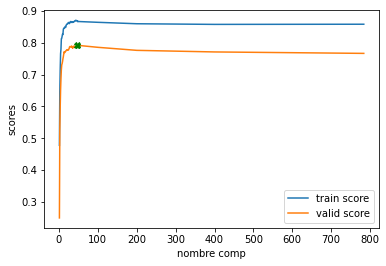

In [174]:
plt.figure()
plt.plot(nComp_range[:100], linear_training_score[:100], label= "train score")
plt.plot(nComp_range[:100], linear_valid_score[:100], label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
bestIndex = np.argmax(linear_valid_score)
bestNC = nComp_range[bestIndex]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')



### Part 1.4 - Bonus question : 
- Compute also the cross validation error for the best hyper parameters choice with `N_train=200`
- Plot the cross validation error as a function of ntrain= 200,2000,20000  
- People often say "let's just get more data". How efficient does that does seem to be ? 

## Part 2: make your own classifier !

## (about 5 points over 20 total)

### Part 2.1
- write down (on paper, and then a little bit here, just the final result) the Loss function for the multi-class perceptron, using the softmax as output activation function.
- derive the update steps for the gradient. (you can get inspiration from TD4.1)
- think up of all the functions you need to write, and put them in a class (you can get inspiration from the correction of TP3.2) - first write a class skeleton, and only then, write the methods inside
- test your algorithm on Fashion-MNIST: make a train / validation / test split , fit the model, compute the cross-val error, and the test error.